In [257]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

In [258]:
data = pd.read_csv('applications data.csv')

In [259]:
import pandas as pd

# Load the dataset
data = pd.read_csv('applications data.csv')  # Replace with your actual file path

# Prepare a list to hold row data
rows = []

# Iterate over the columns in the dataset to fill in the summary table
for col in data.columns:
    unique_values = data[col].nunique()
    records_have_values = data[col].count()
    records_populated_percentage = 100.0 * records_have_values / len(data)
    zeros_count = (data[col] == 0).sum() if data[col].dtype != 'object' else 'N/A'
    most_common_value = data[col].mode()[0] if not data[col].mode().empty else 'N/A'
    min_value = data[col].min() if data[col].dtype != 'object' else 'N/A'
    max_value = data[col].max() if data[col].dtype != 'object' else 'N/A'
    
    # Append the information to rows
    rows.append({
        'Field': col,
        '# records with values': records_have_values,
        '% populated': f'{records_populated_percentage:.2f}%',
        '# zeros': zeros_count,
        '# unique values': unique_values,
        'Most common value': most_common_value,
        'Min': min_value,
        'Max': max_value
    })

# Convert the list of rows into a DataFrame
summary_table = pd.DataFrame(rows)

# Save the summary table as an Excel file
summary_table.to_excel('Field_Summary_Table.xlsx', index=False)

# Output a success message
print("Excel file 'Field_Summary_Table.xlsx' has been created successfully.")


Excel file 'Field_Summary_Table.xlsx' has been created successfully.


In [260]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

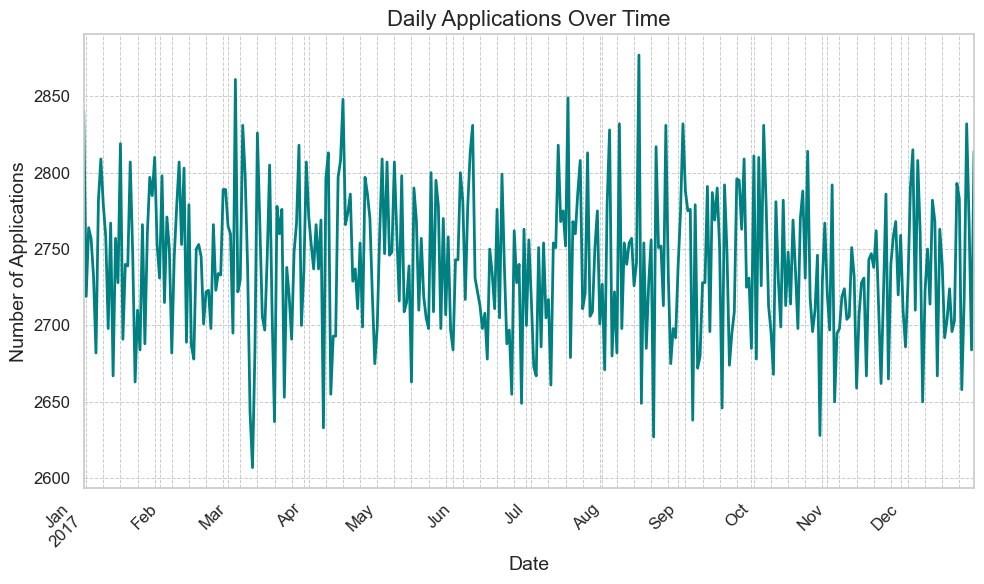

In [261]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Convert 'date' to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d', errors='coerce')
data.set_index('date', inplace=True)

# Generate daily counts of applications
daily_count = data.assign(trx=np.ones(data.shape[0])).resample('D').count().trx

# Sort by date to ensure time is correctly represented
daily_count = daily_count.sort_index()

# Set a consistent color for all plots (you can change 'steelblue' to any color you prefer)
plot_color = 'teal'

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
daily_count.plot(color=plot_color, linewidth=2)  # Line color and thickness

# Add title and labels with proper font size
plt.title('Daily Applications Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for better visibility
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Add tight layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


In [262]:
print(mem_usage(data))

244.69 MB


In [263]:
data.shape

(1000000, 9)

In [264]:
data.dtypes

record          int64
ssn             int64
firstname      object
lastname       object
address        object
zip5            int64
dob             int64
homephone       int64
fraud_label     int64
dtype: object

In [265]:
data.head(10)

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
date,,,,,,,,,
2017-01-01,1,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
2017-01-01,2,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2017-01-01,3,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
2017-01-01,4,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
2017-01-01,5,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
2017-01-01,6,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,19480613,5742016319,0
2017-01-01,7,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,19640318,7697396312,0
2017-01-01,8,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,19190528,2727421586,0
2017-01-01,9,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,19900314,5520652307,0


In [266]:
data.describe(include='all')

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1000000,1000000,1000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
unique,NaN,NaN,78136,177001,828774,NaN,NaN,NaN,NaN
top,NaN,NaN,EAMSTRMT,ERJSAXA,123 MAIN ST,NaN,NaN,NaN,NaN
freq,NaN,NaN,12658,8580,1079,NaN,NaN,NaN,NaN
mean,500000.500000,5.083415e+08,NaN,NaN,NaN,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278932,2.934864e+08,NaN,NaN,NaN,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,3.600000e+01,NaN,NaN,NaN,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.542176e+08,NaN,NaN,NaN,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,5.088144e+08,NaN,NaN,NaN,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,7.630924e+08,NaN,NaN,NaN,74496.000000,1.983032e+07,8.109241e+09,0.000000


### Make best guess to automatically set numerics or categoricals

In [267]:
# add a dummy categorical column for the case the fields all look numeric
data['dummy'] = 'temp'

df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # you can adjust this upper limit for your data set
            print(col)
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch fields some if desired.          
switch_num2cat = ['ssn','zip5','homephone']
switch_cat2num = []
numerics = [s for s in numerics if s not in switch_num2cat]
categoricals = [s for s in categoricals if s not in switch_cat2num]
numerics.extend(switch_cat2num)
categoricals.extend(switch_num2cat)
categoricals.remove('dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)  

record
fraud_label
dummy
numerics: ['dob']

categoricals: ['firstname', 'lastname', 'address', 'record', 'fraud_label', 'ssn', 'zip5', 'homephone']


In [268]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [269]:
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,dob,numeric,1000000,100.0%,0,19000101,20161031,1.951725e+07,356887.02,19070626


In [270]:
import numpy as np
import pandas as pd

statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0],
                             data[col].median()  # Add median here
                             ))

# Create DataFrame and save to Excel
stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common', 'Median'])
stats_dfnum.to_excel('numerics_table_with_median.xlsx', index=False)

# Display the DataFrame
stats_dfnum


,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common,Median
0,dob,numeric,1000000,100.0%,0,19000101,20161031,1.951725e+07,356887.02,19070626,19500901.0


In [271]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,firstname,categorical,1000000,100.0%,0,78136,EAMSTRMT
1,lastname,categorical,1000000,100.0%,0,177001,ERJSAXA
2,address,categorical,1000000,100.0%,0,828774,123 MAIN ST
3,record,categorical,1000000,100.0%,0,1000000,1
4,fraud_label,categorical,1000000,100.0%,985607,2,0
5,ssn,categorical,1000000,100.0%,0,835819,999999999
6,zip5,categorical,1000000,100.0%,0,26370,68138
7,homephone,categorical,1000000,100.0%,0,28244,9999999999


In [272]:
data['appyear'] = (data['date'] / 10000).astype('int')
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int')
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d')
data = data.drop(columns = ['appyear','appmonth','appday'])

KeyError: 'date'

In [114]:
data['dobyear'] = (data['dob'] / 10000).astype('int')
data['dobmonth'] = ((data['dob'] - data['dobyear'] * 10000) / 100).astype('int')
data['dobday'] = data['dob'] - data['dobyear'] * 10000 - data['dobmonth'] * 100
data['dob'] = pd.to_datetime(data.dobyear*10000+data.dobmonth*100+data.dobday,format='%Y%m%d')
data = data.drop(columns = ['dobyear','dobmonth','dobday'])

In [115]:
data.dtypes

record                  int64
date           datetime64[ns]
ssn                     int64
firstname              object
lastname               object
address                object
zip5                    int64
dob            datetime64[ns]
homephone               int64
fraud_label             int64
dummy                  object
dtype: object

In [116]:
data.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0,temp
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1,temp
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0,temp
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0,temp
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0,temp


In [117]:
data.tail(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
999995,999996,2017-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,1955-04-18,8236558223,0,temp
999996,999997,2017-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,1915-06-24,6790134432,0,temp
999997,999998,2017-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,1988-06-28,3997657622,0,temp
999998,999999,2017-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,2012-03-02,5935293731,0,temp
999999,1000000,2017-12-31,40027083,RXZXSMEZA,UTEAAZXU,112 UTTJT PL,39491,1982-08-26,5869926905,0,temp


In [118]:
data.describe()

,record,date,ssn,zip5,dob,homephone,fraud_label
count,1000000.000000,1000000,1.000000e+06,1000000.000000,1000000,1.000000e+06,1000000.000000
mean,500000.500000,2017-07-01 19:54:34.588799744,5.083415e+08,50073.333143,1952-02-26 04:27:50.054400320,5.368716e+09,0.014393
min,1.000000,2017-01-01 00:00:00,3.600000e+01,2.000000,1900-01-01 00:00:00,5.937990e+05,0.000000
25%,250000.750000,2017-04-02 00:00:00,2.542176e+08,24992.000000,1916-09-22 00:00:00,2.677134e+09,0.000000
50%,500000.500000,2017-07-02 00:00:00,5.088144e+08,50492.000000,1950-09-01 00:00:00,5.399910e+09,0.000000
75%,750000.250000,2017-10-01 00:00:00,7.630924e+08,74496.000000,1983-03-16 00:00:00,8.109241e+09,0.000000
max,1000000.000000,2017-12-31 00:00:00,1.000000e+09,99999.000000,2016-10-31 00:00:00,1.000000e+10,1.000000
std,288675.278932,NaN,2.934864e+08,28915.921546,NaN,3.082161e+09,0.119104


In [119]:
categorical_data=data.loc[:, ~data.columns.isin([ 'date','dob'])]

In [120]:
data.count()

record         1000000
date           1000000
ssn            1000000
firstname      1000000
lastname       1000000
address        1000000
zip5           1000000
dob            1000000
homephone      1000000
fraud_label    1000000
dummy          1000000
dtype: int64

In [121]:
data['fraud_label'].sum()

14393

In [122]:
goods = data[data['fraud_label'] == 0]
bads = data[data['fraud_label'] == 1]

In [123]:
numrecords = len(data)
print(numrecords)

1000000


In [124]:
print(len(goods))

985607


In [125]:
print(len(bads))

14393


In [126]:
print(len(goods) + len(bads))

1000000


In [127]:
len(data['record'].unique())

1000000

In [128]:
len(data['record']) * 100 / numrecords

100.0

In [129]:
len(data['date']) * 100 / numrecords

100.0

In [130]:
len(data['date'].unique())

365

In [131]:
count_day = data.groupby('date').count()
count_day.head(10)

,record,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
date,,,,,,,,,,
2017-01-01,2840,2840,2840,2840,2840,2840,2840,2840,2840,2840
2017-01-02,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719
2017-01-03,2764,2764,2764,2764,2764,2764,2764,2764,2764,2764
2017-01-04,2757,2757,2757,2757,2757,2757,2757,2757,2757,2757
2017-01-05,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732
2017-01-06,2682,2682,2682,2682,2682,2682,2682,2682,2682,2682
2017-01-07,2782,2782,2782,2782,2782,2782,2782,2782,2782,2782
2017-01-08,2809,2809,2809,2809,2809,2809,2809,2809,2809,2809
2017-01-09,2779,2779,2779,2779,2779,2779,2779,2779,2779,2779


<Axes: title={'center': 'Daily Applications'}, xlabel='date'>

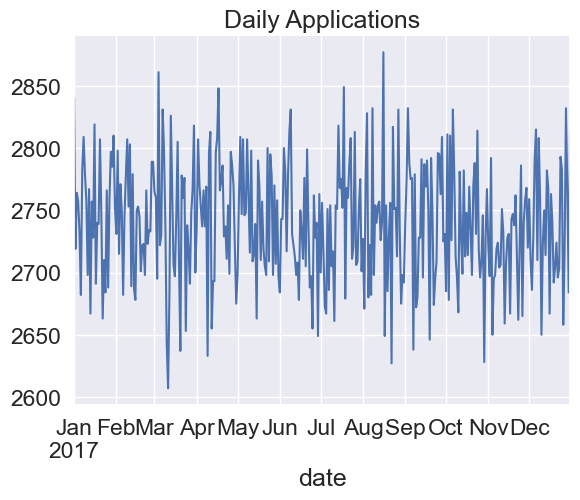

In [132]:
daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Daily Applications')

/Users/maehikahegde/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


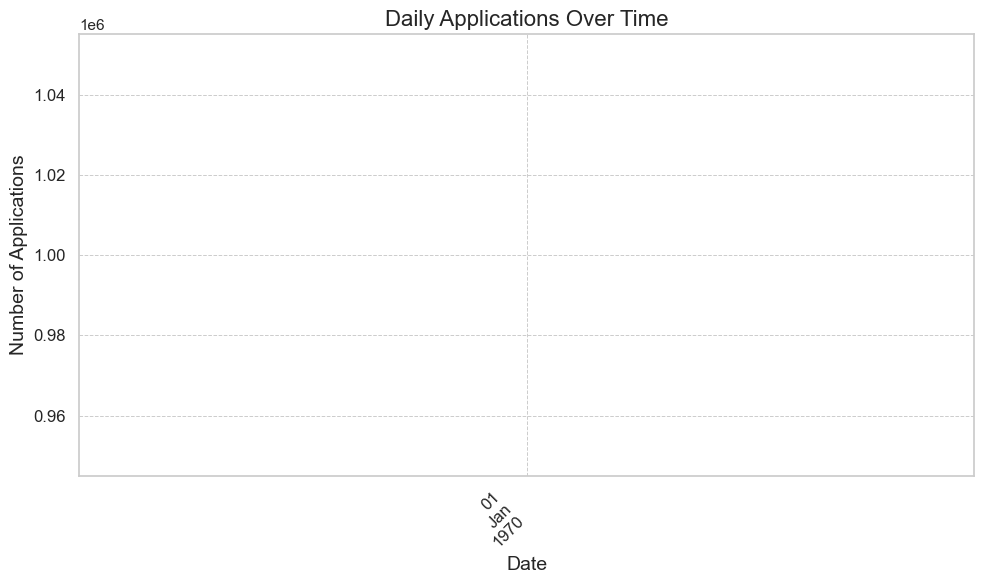

In [229]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Ensure 'date' column is in datetime format and set as index
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Set 'date' as the index for the DataFrame
data.set_index('date', inplace=True)

# Generate the daily counts of applications, resampling by day
daily_count = data.assign(trx=np.ones(data.shape[0])).resample('D').count().trx

# Create the plot with enhanced visualization
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
daily_count.plot(color='teal', linewidth=2)  # Set color and line thickness

# Add title and axis labels with proper font size
plt.title('Daily Applications Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for better visibility
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Add tight layout to prevent label clipping
plt.tight_layout()

# Show the plot
plt.show()


In [230]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Ensure 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d', errors='coerce')

# Set 'date' as the index for the DataFrame
data.set_index('date', inplace=True)

# Generate the daily counts of applications, resampling by day
daily_count = data.assign(trx=np.ones(data.shape[0])).resample('D').count().trx

# Sort by date to ensure time is correctly represented
daily_count = daily_count.sort_index()

# Create the plot with enhanced visualization
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
daily_count.plot(color='teal', linewidth=2)  # Line color and thickness

# Add title and labels with proper font size
plt.title('Daily Applications Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for better visibility
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Add tight layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


KeyError: 'date'

In [133]:
daily_count.head(70)

date
2017-01-01    2840
2017-01-02    2719
2017-01-03    2764
2017-01-04    2757
2017-01-05    2732
              ... 
2017-03-07    2831
2017-03-08    2798
2017-03-09    2738
2017-03-10    2643
2017-03-11    2607
Freq: D, Name: trx, Length: 70, dtype: int64

In [134]:
# daily_count['2016-02-29'] = daily_count['2016-02-28']
# daily_count.head(70)

<Axes: title={'center': 'Daily Applications'}, xlabel='date'>

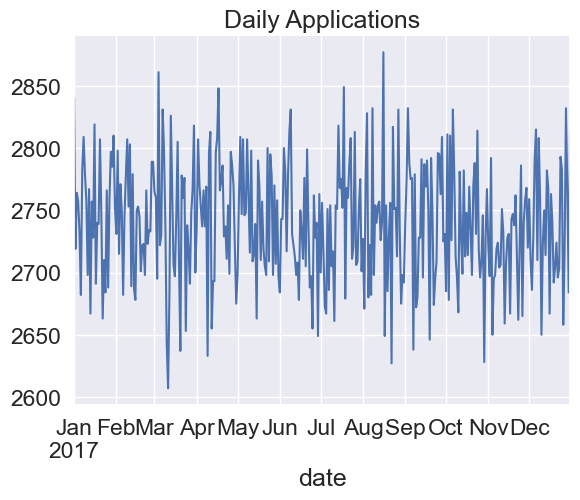

In [135]:
daily_count.plot(title = 'Daily Applications')

<Axes: title={'center': 'Daily Applicationss'}, xlabel='date'>

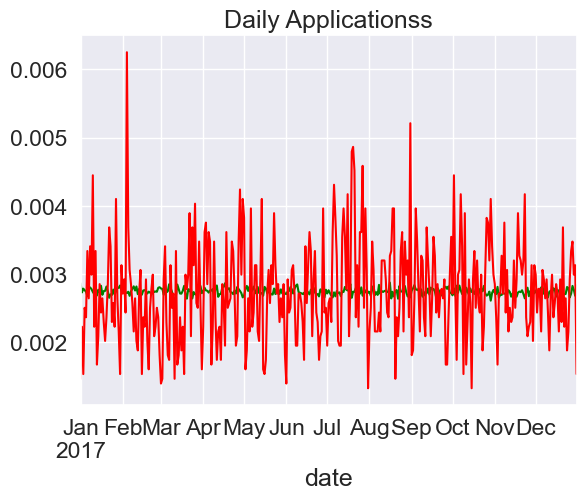

In [136]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Applicationss', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<Axes: title={'center': 'Weekly Applications'}, xlabel='date'>

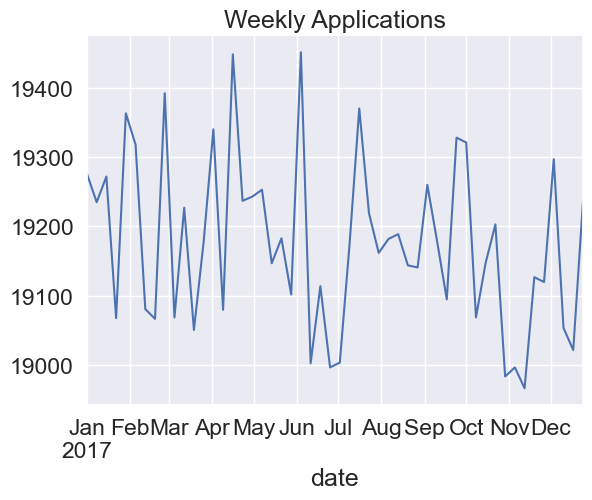

In [137]:
weekly_applications = data.assign(trx = np.ones(numrecords)).set_index(data['date']).resample(dt.timedelta(days = 7))\
    .count().trx
weekly_applications = weekly_applications[:-1]
weekly_applications.plot(title = 'Weekly Applications')

<Axes: title={'center': 'Weeky Applications'}, xlabel='date'>

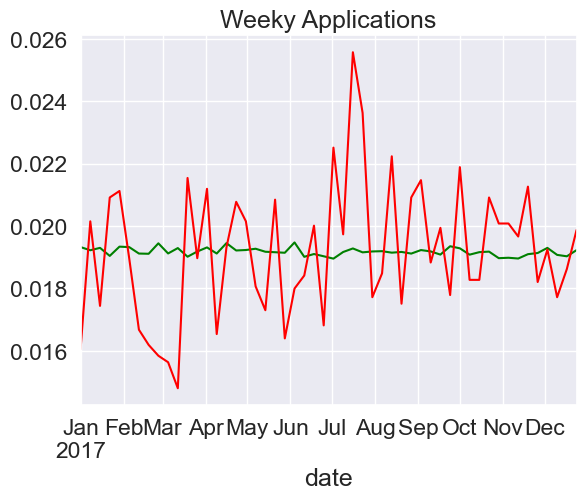

In [138]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['date']).resample(dt.timedelta(days = 7)).count().trx
goods_series = goods_series[:-1]
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Applications', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['date']).resample(dt.timedelta(days = 7)).count().trx
bads_series = bads_series[:-1]
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

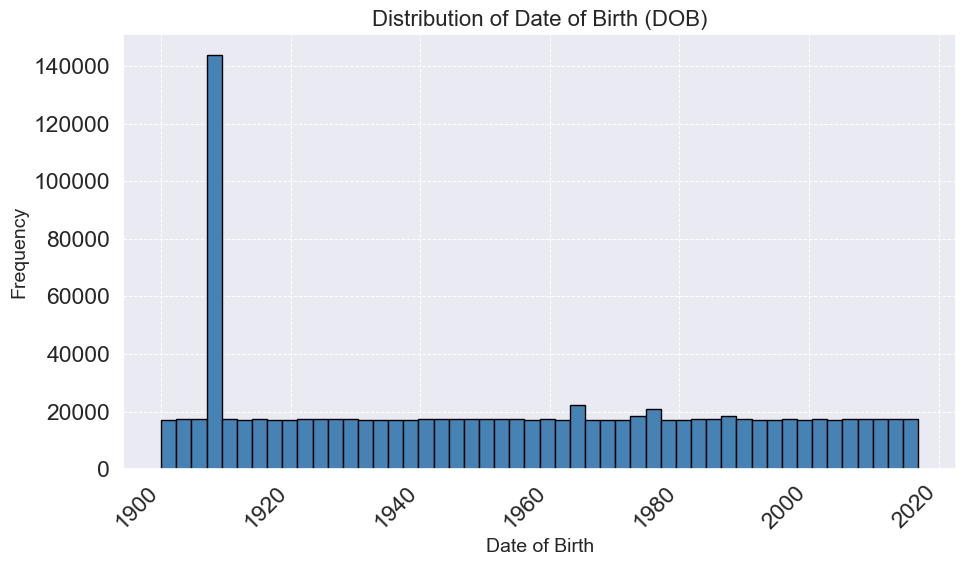

In [210]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'dob' to datetime if not already done
data['dob'] = pd.to_datetime(data['dob'], format='%Y%m%d', errors='coerce')

# Create the histogram for 'dob' distribution
plt.figure(figsize=(10, 6))
plt.hist(data['dob'].dropna(), bins=50, color='steelblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Date of Birth (DOB)', fontsize=16)
plt.xlabel('Date of Birth', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', linewidth=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [231]:
# Check for the actual column name
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d', errors='coerce')

# Set 'Date' as the index for the DataFrame
data.set_index('Date', inplace=True)

# Generate the daily counts of applications, resampling by day
daily_count = data.assign(trx=np.ones(data.shape[0])).resample('D').count().trx

# Sort by date to ensure time is correctly represented
daily_count = daily_count.sort_index()

# Create the plot with enhanced visualization
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
daily_count.plot(color='teal', linewidth=2)  # Line color and thickness

# Add title and labels with proper font size
plt.title('Daily Applications Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for better visibility
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Add tight layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


KeyError: 'Date'

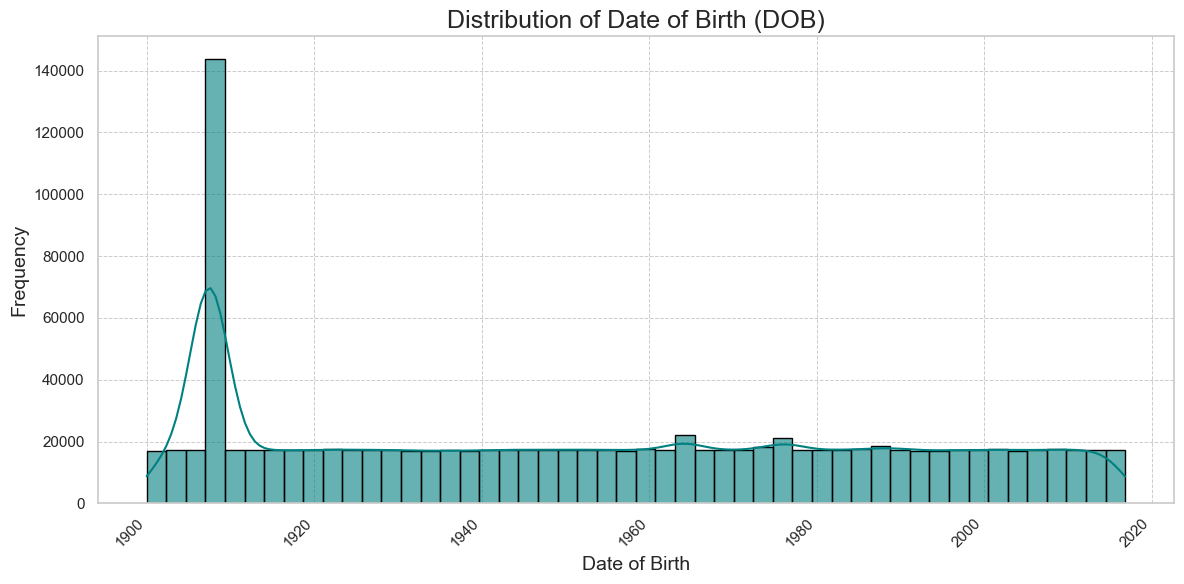

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'dob' to datetime if not already done
data['dob'] = pd.to_datetime(data['dob'], format='%Y%m%d', errors='coerce')

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with a larger size
plt.figure(figsize=(12, 6))

# Plot both a KDE and histogram for the 'dob' distribution
sns.histplot(data['dob'].dropna(), bins=50, color='teal', kde=True, edgecolor='black', alpha=0.6)

# Add title and axis labels
plt.title('Distribution of Date of Birth (DOB)', fontsize=18)
plt.xlabel('Date of Birth', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', linewidth=0.7)

# Adjust the layout to avoid label overlap
plt.tight_layout()

# Display the plot
plt.show()


In [139]:
len(data['ssn']) * 100 / numrecords

100.0

In [140]:
len(data['ssn'].unique())

835819

In [141]:
data['ssn'].value_counts()

ssn
999999999    16935
938972725      114
810776805       81
829352390       74
473311863       44
             ...  
571979227        1
154696808        1
962389432        1
746697518        1
361232148        1
Name: count, Length: 835819, dtype: int64

<Axes: xlabel='ssn'>

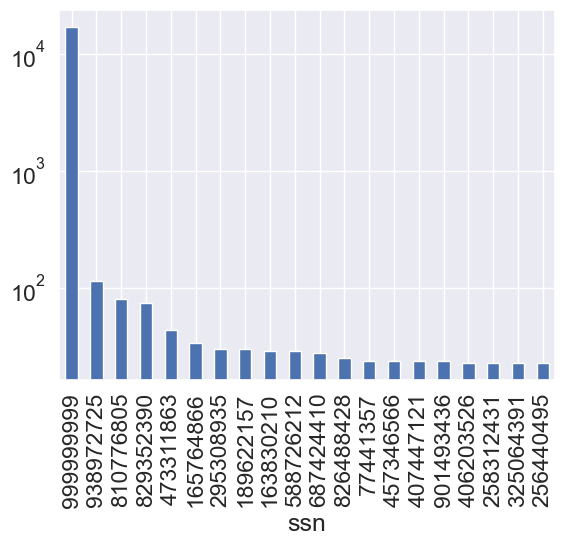

In [142]:
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True)

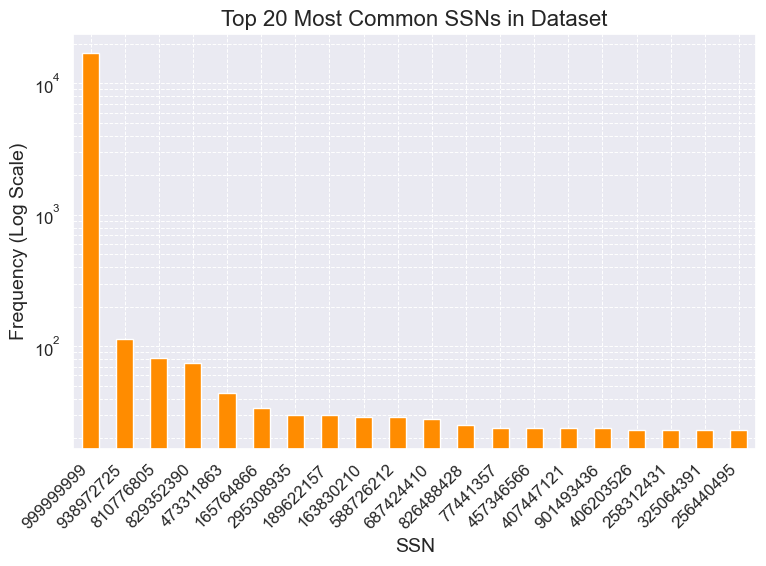

In [206]:
import matplotlib.pyplot as plt

# Create a figure and axis object
plt.figure(figsize=(8, 6))

# Plot the data with logarithmic scale on the y-axis and custom bar color
data['ssn'].value_counts().head(20).plot(kind='bar', logy=True, color='darkorange')

# Title and axis labels
plt.title('Top 20 Most Common SSNs in Dataset', fontsize=16)
plt.xlabel('SSN', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Increase the y-axis font size
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Adjust layout to prevent clipping of tick labels
plt.tight_layout()

# Show the plot
plt.show()



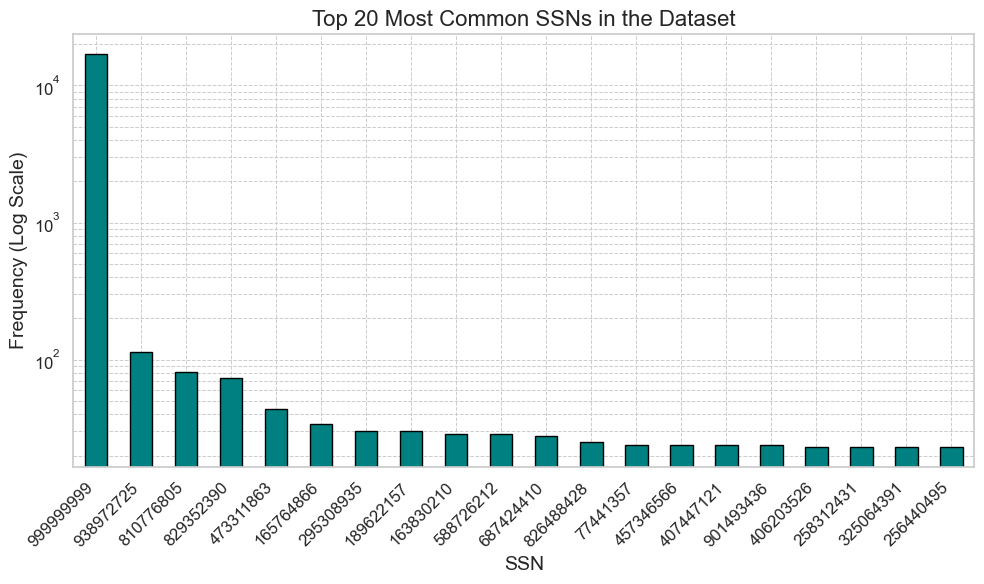

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the top 20 most common SSNs with a logarithmic scale on the y-axis
data['ssn'].value_counts().head(20).plot(kind='bar', logy=True, color='teal', edgecolor='black')

# Add title and axis labels with proper font size
plt.title('Top 20 Most Common SSNs in the Dataset', fontsize=16)
plt.xlabel('SSN', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add y-axis ticks for better readability and font size
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()


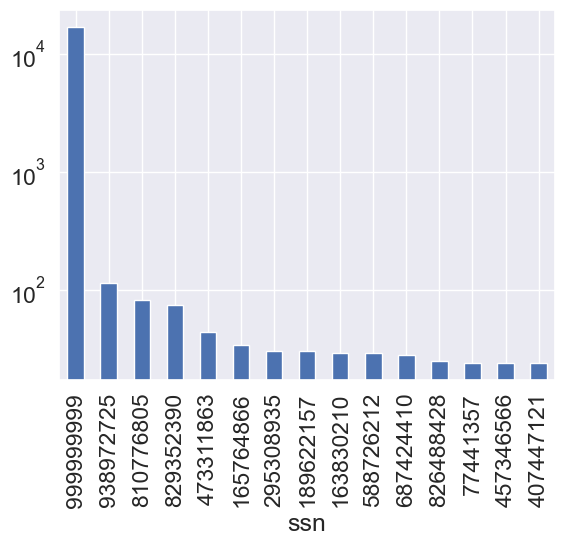

In [143]:
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')

In [144]:
data[data['ssn'] == 999999999].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
10,11,2017-01-01,999999999,UZZSMXSEE,USJZUSA,726 UMTXU ST,92129,1940-01-26,3026547212,0,temp
22,23,2017-01-01,999999999,ETXMUSZEM,UJMAMEU,3387 STRUM WY,45982,1958-08-30,5568704443,0,temp
64,65,2017-01-01,999999999,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,1907-06-26,9999999999,0,temp
68,69,2017-01-01,999999999,UUZAJXZMT,SRAAMZXU,2557 URRXS DR,98407,2011-08-31,5490098836,0,temp
74,75,2017-01-01,999999999,AUATMMZX,UUUTAZR,30 ETXRM ST,38402,1976-06-25,2382673773,0,temp
283,284,2017-01-01,999999999,MSJUZSMZJ,UXMTEZUT,356 UZSRE AVE,74187,1907-06-26,153492955,0,temp
380,381,2017-01-01,999999999,XRJSMRRRT,RMRXAMX,9769 UAMZJ DR,52351,1907-06-26,3181686949,0,temp
420,421,2017-01-01,999999999,XRXMTMZEZ,SZRXXJMX,5854 RXRXX PL,34957,1997-07-21,316681200,0,temp
446,447,2017-01-01,999999999,RRZUZUSX,ESZRRRAA,8970 AXME RD,48333,1911-07-29,5350782211,0,temp
468,469,2017-01-01,999999999,XETRJXESR,SSJXTUJM,6995 RMSST CT,48162,1970-04-18,2503172355,0,temp


In [145]:
len(data[data['ssn'] == 999999999])

16935

In [146]:
data.loc[data['ssn'] == 999999999, 'ssn'] = data.loc[data['ssn'] == 999999999, 'record']

In [147]:
len(data[data['ssn'] == 999999999])

0

In [148]:
data.head(25)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26,1797504115,0,temp
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15,4164239415,1,temp
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26,216537580,0,temp
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30,132144161,0,temp
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15,6101082272,0,temp
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,1948-06-13,5742016319,0,temp
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,1964-03-18,7697396312,0,temp
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,1919-05-28,2727421586,0,temp
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,1990-03-14,5520652307,0,temp
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,1975-01-27,3749451123,0,temp


<Axes: xlabel='ssn'>

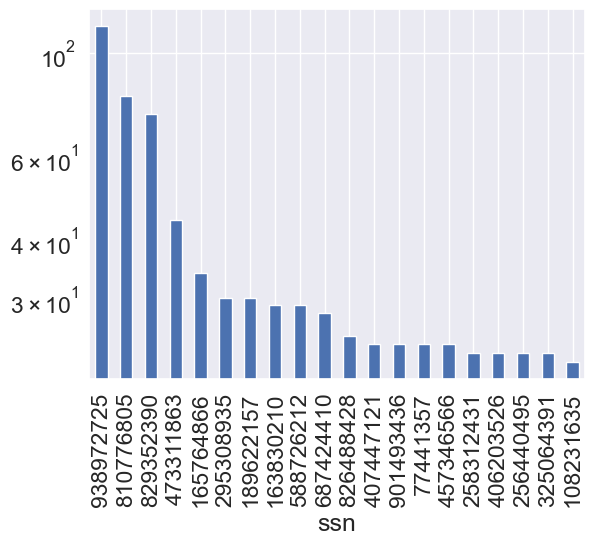

In [149]:
data['ssn'].value_counts().head(20).plot(kind='bar',logy=True)

In [150]:
len(data['firstname']) * 100 / numrecords

100.0

In [151]:
len(data['firstname'].unique())

78136

In [152]:
data['firstname'].value_counts()

firstname
EAMSTRMT     12658
TXEMXZZM     10297
UXXJJZTUZ    10235
UJSRSMUEZ     9994
SREZUJMJU     9688
             ...  
TUSSMZJA         1
SSAZJXSRM        1
UATETTATJ        1
UASJMZXZJ        1
RUZUJJRMX        1
Name: count, Length: 78136, dtype: int64

<Axes: xlabel='firstname'>

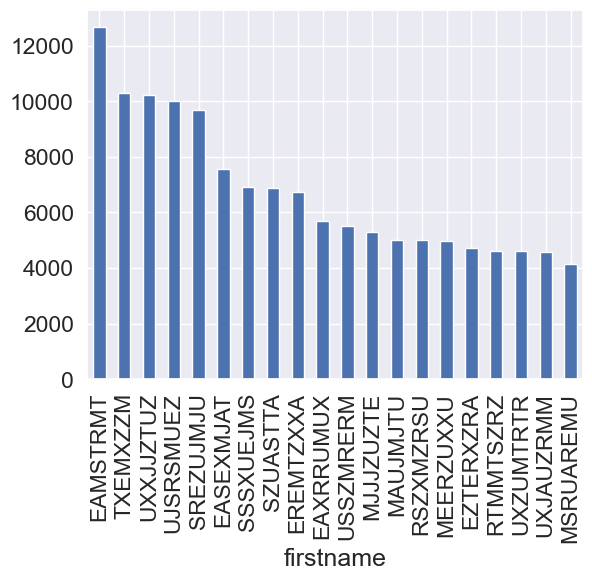

In [153]:
data['firstname'].value_counts().head(20).plot(kind='bar')

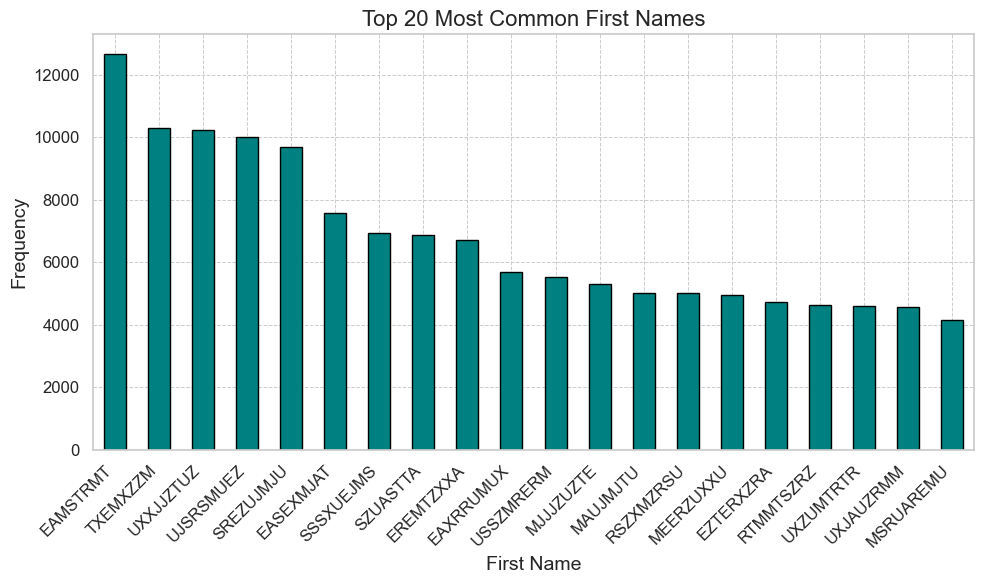

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create the figure with a larger size for better readability
plt.figure(figsize=(10, 6))

# Plot the top 20 most common first names
data['firstname'].value_counts().head(20).plot(kind='bar', color='teal', edgecolor='black')

# Add title and labels with proper font size
plt.title('Top 20 Most Common First Names', fontsize=16)
plt.xlabel('First Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Increase the y-axis tick label size for better readability
plt.yticks(fontsize=12)

# Add grid lines to improve readability
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Use tight layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()


In [154]:
len(data['lastname']) * 100 / numrecords

100.0

In [155]:
len(data['lastname'].unique())

177001

In [156]:
data['lastname'].value_counts()

lastname
ERJSAXA     8580
UMXUUUSE    7156
UMARRMA     6832
MEAXJUX     5492
XMERRR      5451
            ... 
RMJZJRMJ       1
SSUTSMUM       1
EXASZEXS       1
UERZXTTR       1
RMJZURRS       1
Name: count, Length: 177001, dtype: int64

<Axes: xlabel='lastname'>

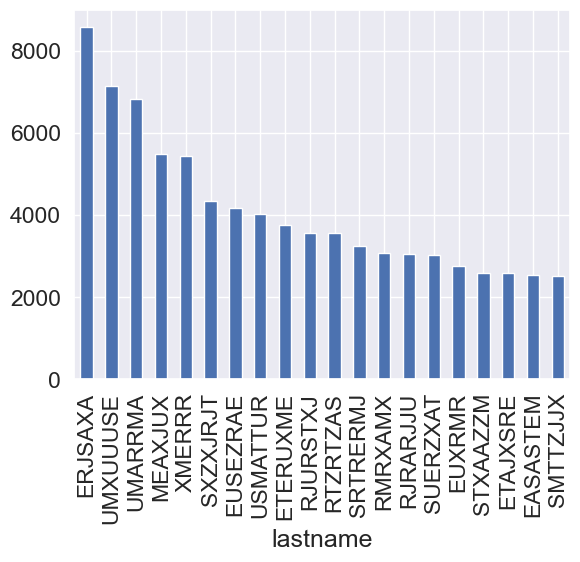

In [157]:
data['lastname'].value_counts().head(20).plot(kind='bar')

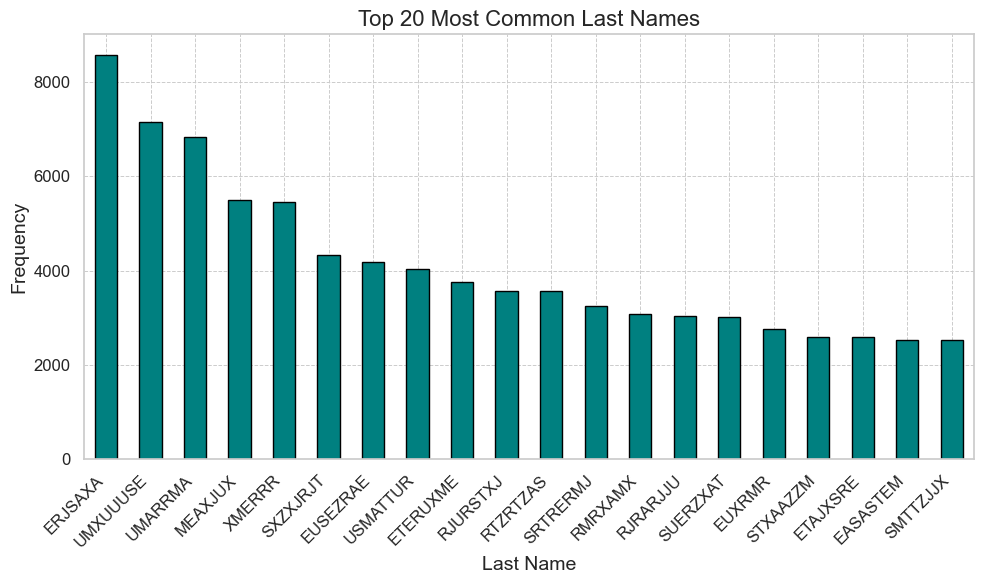

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style using seaborn for a clean look
sns.set(style="whitegrid")

# Create the figure and adjust the size for clarity
plt.figure(figsize=(10, 6))

# Plot the top 20 most common last names
data['lastname'].value_counts().head(20).plot(kind='bar', color='teal', edgecolor='black')

# Add title and labels with proper font size
plt.title('Top 20 Most Common Last Names', fontsize=16)
plt.xlabel('Last Name', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for better readability
plt.yticks(fontsize=12)

# Add grid lines to improve the visual representation
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Use tight layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


In [158]:
len(data['address']) * 100 / numrecords

100.0

In [159]:
len(data['address'].unique())

828774

In [160]:
data['address'].value_counts()

address
123 MAIN ST        1079
1775 XJXE LN         97
7433 RAEZA ST        80
8911 MZSU DR         74
4907 RRAAU DR        73
                   ... 
1179 RATUS BLVD       1
8006 SSRJM ST         1
6327 MAXR ST          1
4937 ESAMR LN         1
3408 UZZAM WY         1
Name: count, Length: 828774, dtype: int64

<Axes: xlabel='address'>

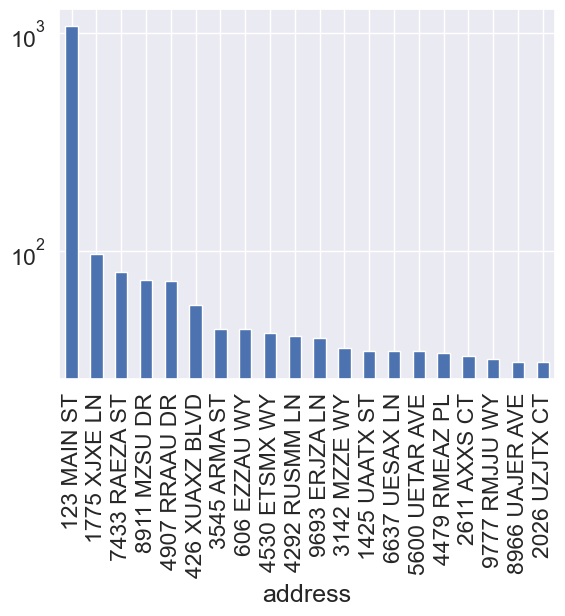

In [161]:
data['address'].value_counts().head(20).plot(kind='bar',logy=True)

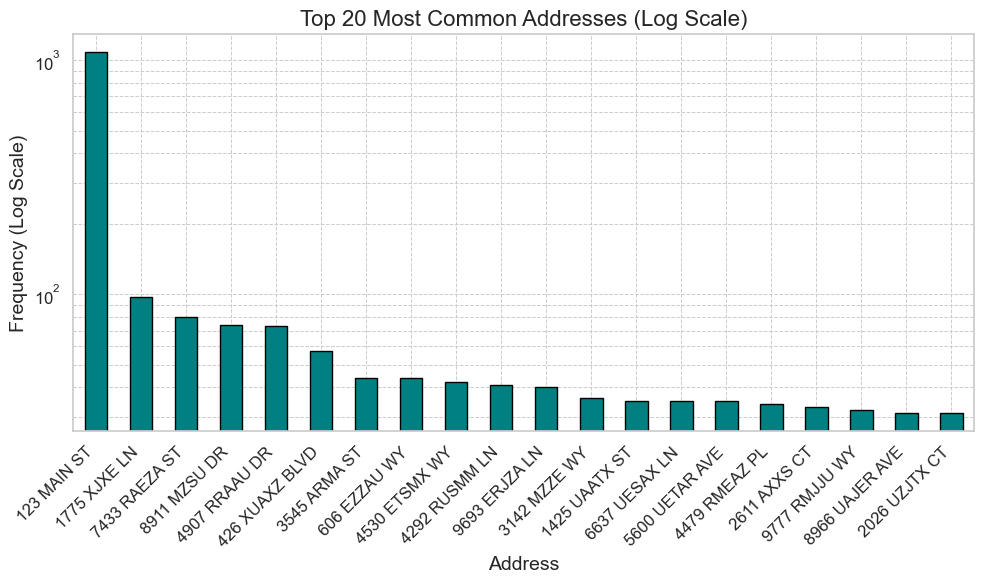

In [233]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style using seaborn for a clean look
sns.set(style="whitegrid")

# Create the figure and adjust the size for clarity
plt.figure(figsize=(10, 6))

# Plot the top 20 most common addresses with a logarithmic scale on the y-axis
data['address'].value_counts().head(20).plot(kind='bar', logy=True, color='teal', edgecolor='black')

# Add title and labels with proper font size
plt.title('Top 20 Most Common Addresses (Log Scale)', fontsize=16)
plt.xlabel('Address', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for better readability and ensure they are clearly labeled
plt.yticks(fontsize=12)

# Add grid lines to improve the visual representation
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Use tight layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()


In [162]:
data[data['address'] == '123 MAIN ST'].head(20)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
1247,1248,2017-01-01,904524264,UJSRSMUEZ,EAXAXAXA,123 MAIN ST,68138,1924-10-31,8135264540,0,temp
2191,2192,2017-01-01,345413970,XXSMUSEJT,SRRAXESJ,123 MAIN ST,68138,1930-05-26,94097353,0,temp
2529,2530,2017-01-01,821839005,UXZUMTRTR,EARTMRJS,123 MAIN ST,68138,1962-11-01,7715547340,0,temp
3434,3435,2017-01-02,24205988,SXTUZZXAS,UJJAJMM,123 MAIN ST,68138,1964-04-28,8788942828,0,temp
3750,3751,2017-01-02,623763056,SEZESJMSR,UZJEUZMT,123 MAIN ST,68138,1973-11-07,974228226,0,temp
4715,4716,2017-01-02,686787130,SXXSZJMM,ARRZTAA,123 MAIN ST,68138,1981-03-23,1839236819,1,temp
5353,5354,2017-01-02,932938215,UXRJESTM,EETAEAR,123 MAIN ST,68138,1998-05-13,5441682419,0,temp
7299,7300,2017-01-03,417080344,SJETUJAAZ,REMJTREU,123 MAIN ST,92821,1934-09-14,7507186577,0,temp
8512,8513,2017-01-04,477797652,EAMSTRMT,UTXXZZET,123 MAIN ST,68138,1919-05-19,5922864904,0,temp
8750,8751,2017-01-04,6367698,XUERJXSTU,EERMEXAE,123 MAIN ST,42035,1982-11-27,6442565981,0,temp


In [163]:
len(data['zip5']) * 100 / numrecords

100.0

In [164]:
len(data['zip5'].unique())

26370

In [165]:
data['zip5'].value_counts()

zip5
68138    823
90042    514
89835    489
35227    478
14931    459
        ... 
1599       1
69474      1
51017      1
25995      1
21226      1
Name: count, Length: 26370, dtype: int64

<Axes: xlabel='zip5'>

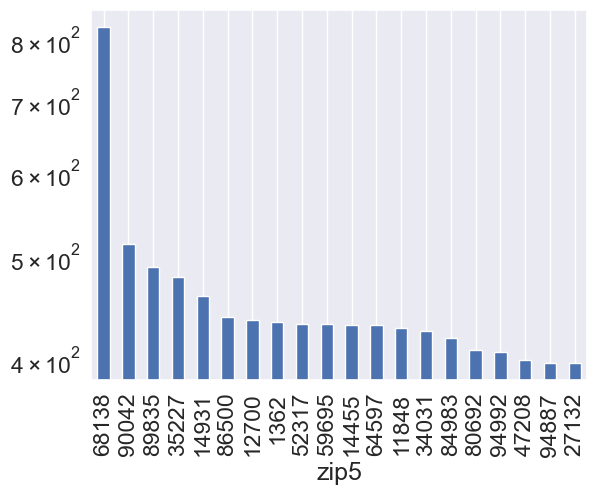

In [166]:
data['zip5'].value_counts().head(20).plot(kind='bar',logy=True)

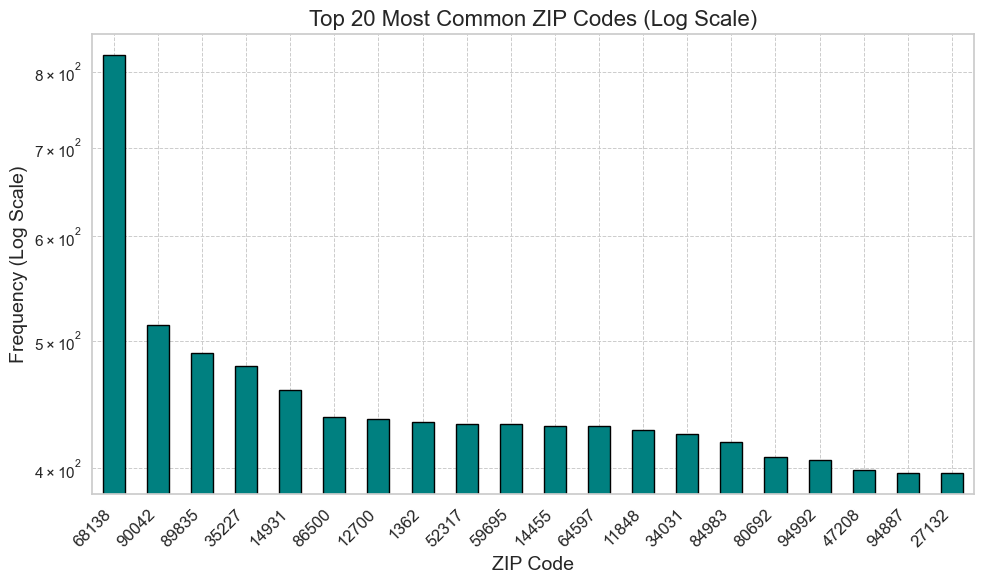

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style using seaborn for a clean look
sns.set(style="whitegrid")

# Create the figure and adjust the size for clarity
plt.figure(figsize=(10, 6))

# Plot the top 20 most common ZIP codes with a logarithmic scale on the y-axis
data['zip5'].value_counts().head(20).plot(kind='bar', logy=True, color='teal', edgecolor='black')

# Add title and labels with proper font size
plt.title('Top 20 Most Common ZIP Codes (Log Scale)', fontsize=16)
plt.xlabel('ZIP Code', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for better visibility, ensure clear log scale labeling
plt.yticks(fontsize=12)

# Add grid lines to improve visual clarity
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Use tight layout to prevent label and title clipping
plt.tight_layout()

# Show the plot
plt.show()


In [167]:
data['fulladdress'] = data['address'] + ' ' + data['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

<Axes: xlabel='fulladdress'>

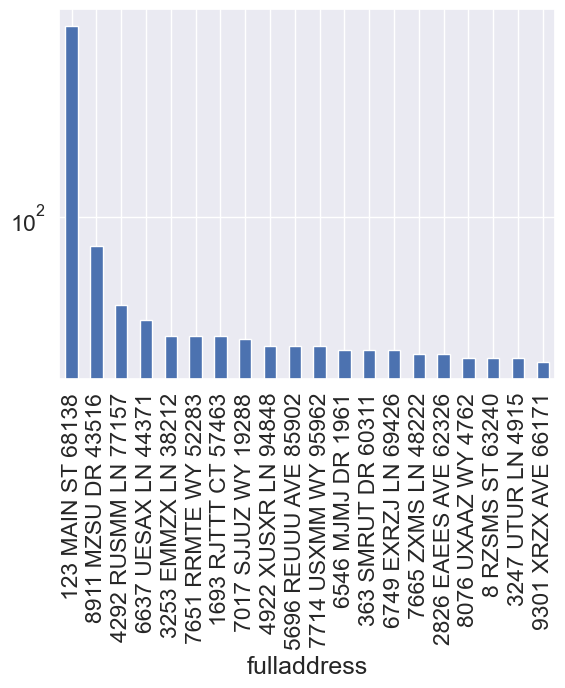

In [168]:
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True)

In [169]:
old_address = [data.iloc[1247]['address'],data.iloc[2191]['address'],data.iloc[2529]['address']]
print(old_address)

['123 MAIN ST', '123 MAIN ST', '123 MAIN ST']


In [170]:
len(data[data['address'] == '123 MAIN ST'])

1079

In [171]:
data.loc[data['address'] == '123 MAIN ST', 'address'] = data.loc[data['address'] == '123 MAIN ST', 'record'].astype('str')

In [172]:
len(data[data['address'] == '123 MAIN ST'])

0

In [173]:
new_address = [data.iloc[1247]['address'],data.iloc[2191]['address'],data.iloc[2529]['address']]
print(new_address)

['1248', '2192', '2530']


In [174]:
data['fulladdress'] = data['address'] + ' ' + data['zip5'].astype('str')
# data = data.drop(columns = ['zip5', 'address'])

<Axes: xlabel='fulladdress'>

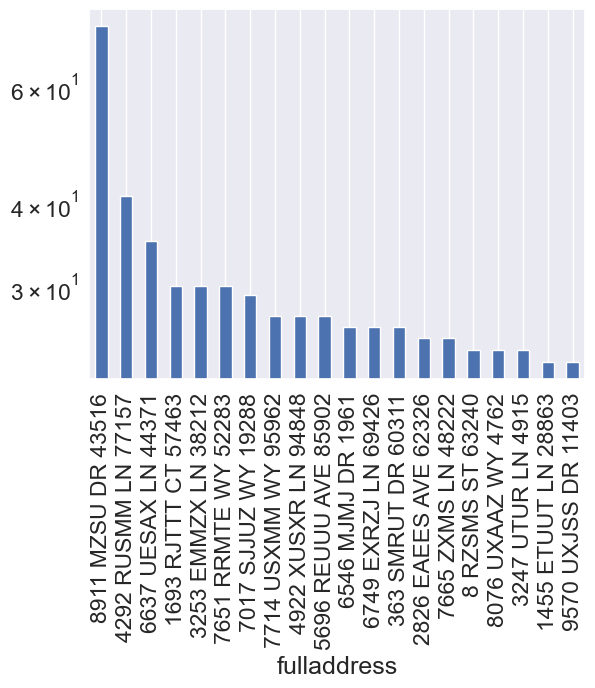

In [175]:
data['fulladdress'].value_counts().head(20).plot(kind='bar',logy=True)

In [176]:
len(data['dob']) * 100 / numrecords

100.0

In [177]:
len(data['dob'].unique())

42673

In [178]:
data['dob'].value_counts()

dob
1907-06-26    126568
1964-03-18      4818
1976-06-25      3723
1988-06-28      1404
1974-02-16       980
               ...  
1928-07-30         5
1986-03-13         5
1919-02-23         5
1944-11-27         5
1996-09-04         5
Name: count, Length: 42673, dtype: int64

<Axes: xlabel='dob'>

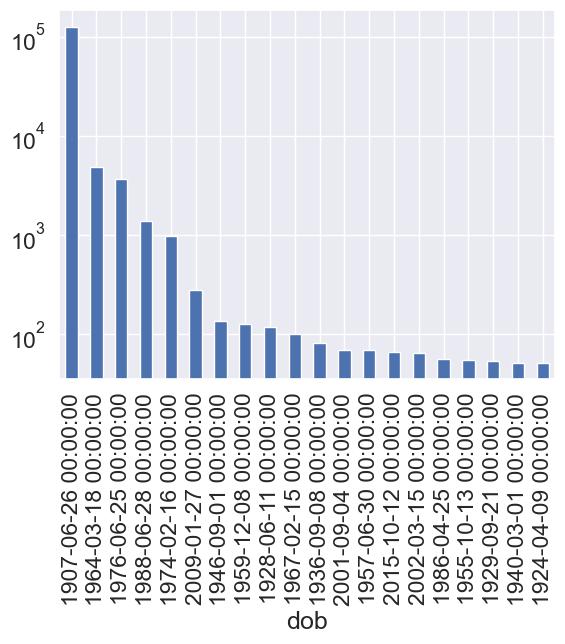

In [179]:
data['dob'].value_counts().head(20).plot(kind='bar',logy=True)

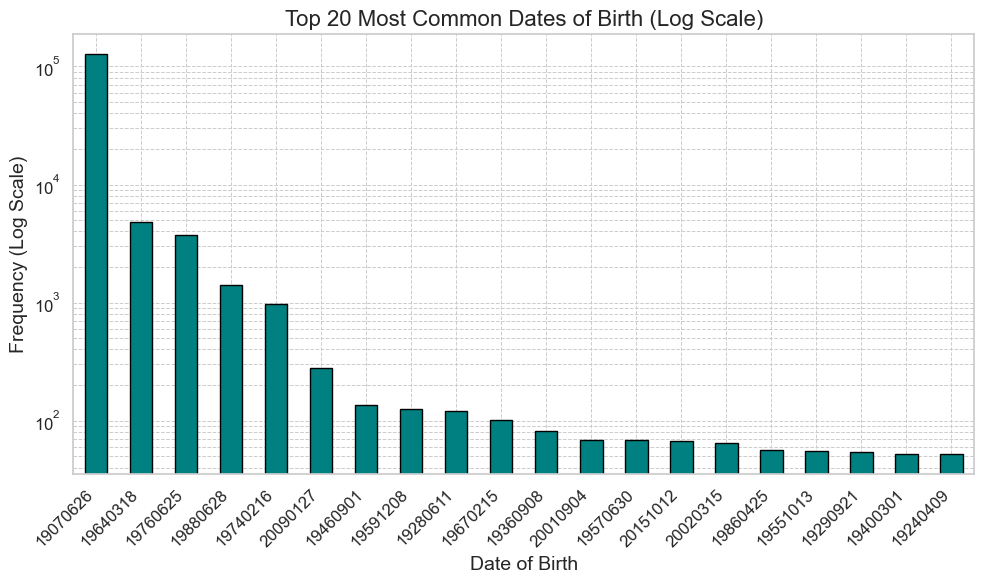

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style using seaborn for a clean look
sns.set(style="whitegrid")

# Create the figure and adjust the size for better clarity
plt.figure(figsize=(10, 6))

# Plot the top 20 most common DOBs with a logarithmic scale on the y-axis
data['dob'].value_counts().head(20).plot(kind='bar', logy=True, color='teal', edgecolor='black')

# Add title and labels with proper font size
plt.title('Top 20 Most Common Dates of Birth (Log Scale)', fontsize=16)
plt.xlabel('Date of Birth', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for better visibility and ensure proper log scale labeling
plt.yticks(fontsize=12)

# Add grid lines to improve visual clarity
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Use tight layout to avoid label and title clipping
plt.tight_layout()

# Show the plot
plt.show()


In [180]:
count_dob = data.groupby('dob').count()
count_dob.head(10)

,record,date,ssn,firstname,lastname,address,zip5,homephone,fraud_label,dummy,fulladdress
dob,,,,,,,,,,,
1900-01-01,23,23,23,23,23,23,23,23,23,23,23
1900-01-02,15,15,15,15,15,15,15,15,15,15,15
1900-01-03,26,26,26,26,26,26,26,26,26,26,26
1900-01-04,22,22,22,22,22,22,22,22,22,22,22
1900-01-05,17,17,17,17,17,17,17,17,17,17,17
1900-01-06,25,25,25,25,25,25,25,25,25,25,25
1900-01-07,22,22,22,22,22,22,22,22,22,22,22
1900-01-08,18,18,18,18,18,18,18,18,18,18,18
1900-01-09,12,12,12,12,12,12,12,12,12,12,12


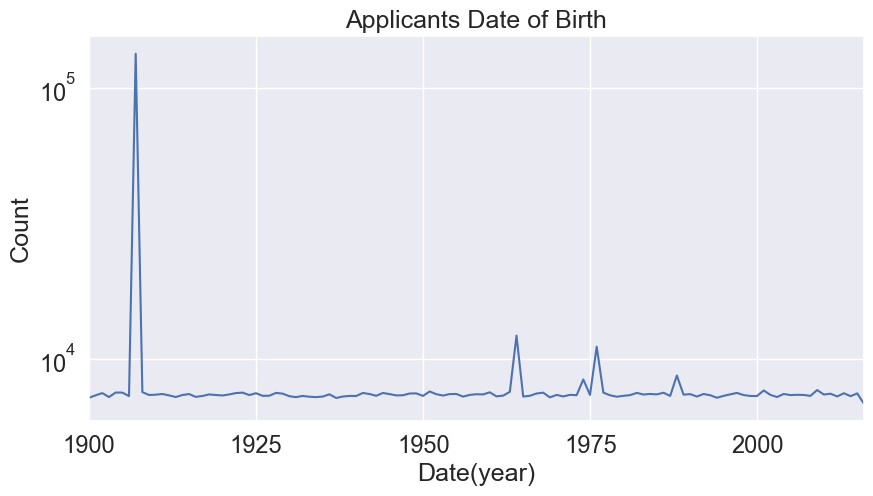

In [181]:
dob_count = data.assign(trx = np.ones(numrecords)).set_index(data['dob']).resample(dt.timedelta(days = 365))\
.count().trx
dob_count.plot(figsize=(10,5), fontsize=17, title = 'Applicants Date of Birth', xlabel='Date(year)', ylabel='Count')
plt.yscale('log')

/Users/maehikahegde/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


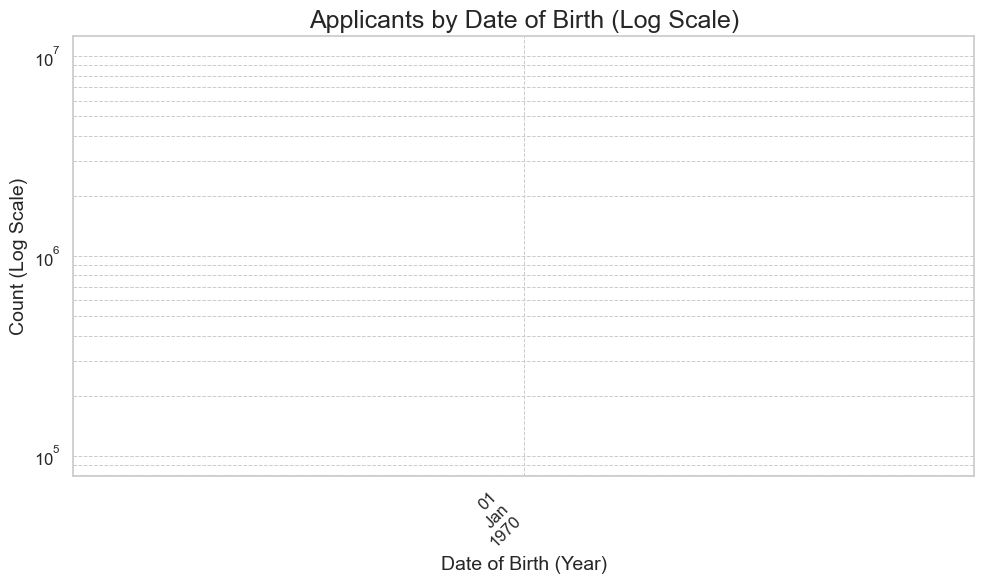

In [235]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Ensure 'dob' column is in datetime format
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')

# Resample DOB counts by year (365 days)
dob_count = data.assign(trx=np.ones(data.shape[0])).set_index(data['dob']).resample(dt.timedelta(days=365)).count().trx

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the DOB count with teal color
dob_count.plot(color='teal', linewidth=2)

# Set log scale for the y-axis
plt.yscale('log')

# Add title and labels with appropriate font sizes
plt.title('Applicants by Date of Birth (Log Scale)', fontsize=18)
plt.xlabel('Date of Birth (Year)', fontsize=14)
plt.ylabel('Count (Log Scale)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Increase y-axis tick label size for clarity
plt.yticks(fontsize=12)

# Add grid lines with better visibility
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Use tight layout to avoid label clipping
plt.tight_layout()

# Display the plot
plt.show()


In [182]:
data.loc[data['dob'] == 19070626, 'dob'] = data.loc[data['dob'] == 19070626, 'record']

/var/folders/k9/62mpfz413bxfg1_cth95xn5c0000gn/T/ipykernel_28433/2384200953.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.loc[data['dob'] == 19070626, 'dob'] = data.loc[data['dob'] == 19070626, 'record']


/var/folders/k9/62mpfz413bxfg1_cth95xn5c0000gn/T/ipykernel_28433/3526062804.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  data['dob'].value_counts().head(20).plot(kind='bar',logy=True)


<Axes: xlabel='dob'>

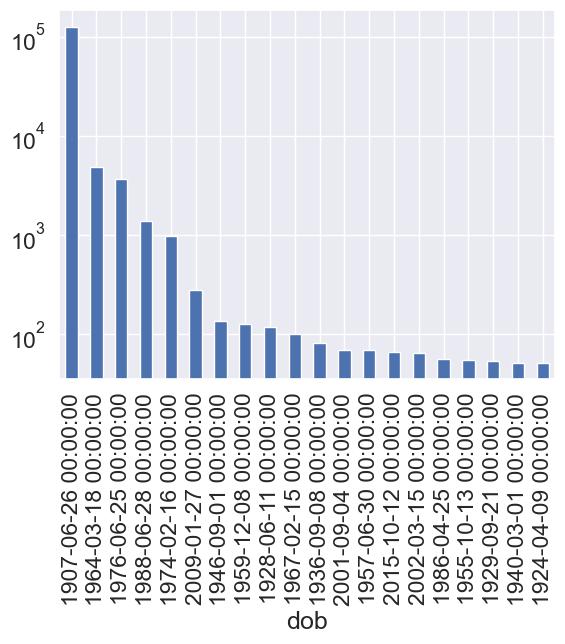

In [183]:
data['dob'].value_counts().head(20).plot(kind='bar',logy=True)

In [184]:
len(data['homephone']) * 100 / numrecords

100.0

In [185]:
len(data['homephone'].unique())

28244

In [186]:
data['homephone'].value_counts()

homephone
9999999999    78512
6384782007      466
6035129044      360
2113738531      331
4024680535      198
              ...  
3450484388        1
5376503138        1
7106175831        1
5010200060        1
6271618925        1
Name: count, Length: 28244, dtype: int64

/var/folders/k9/62mpfz413bxfg1_cth95xn5c0000gn/T/ipykernel_28433/575063472.py:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dob_count = data.assign(trx=np.ones(data.shape[0])).set_index(data['dob']).resample('Y').count().trx
/Users/maehikahegde/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


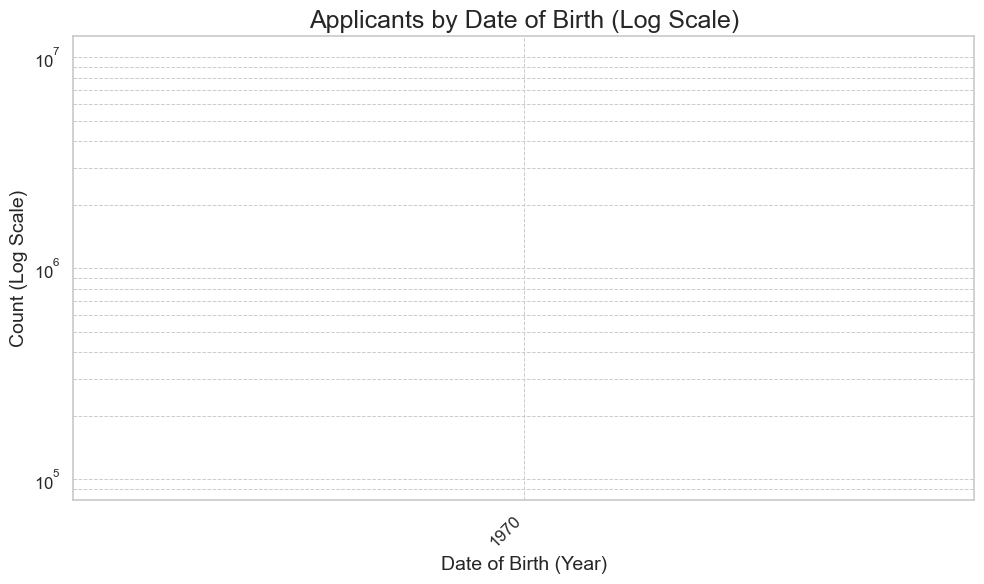

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Ensure 'dob' column is in datetime format
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')

# Check if the dob column has valid datetime values
if data['dob'].isnull().all():
    print("The 'dob' column contains no valid dates.")
else:
    # Resample DOB counts by year (365 days)
    dob_count = data.assign(trx=np.ones(data.shape[0])).set_index(data['dob']).resample('Y').count().trx

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the DOB count with teal color
    dob_count.plot(color='teal', linewidth=2)

    # Set log scale for the y-axis
    plt.yscale('log')

    # Add title and labels with appropriate font sizes
    plt.title('Applicants by Date of Birth (Log Scale)', fontsize=18)
    plt.xlabel('Date of Birth (Year)', fontsize=14)
    plt.ylabel('Count (Log Scale)', fontsize=14)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=12)

    # Increase y-axis tick label size for clarity
    plt.yticks(fontsize=12)

    # Add grid lines with better visibility
    plt.grid(True, which="both", linestyle='--', linewidth=0.7)

    # Use tight layout to avoid label clipping
    plt.tight_layout()

    # Display the plot
    plt.show()


<Axes: xlabel='homephone'>

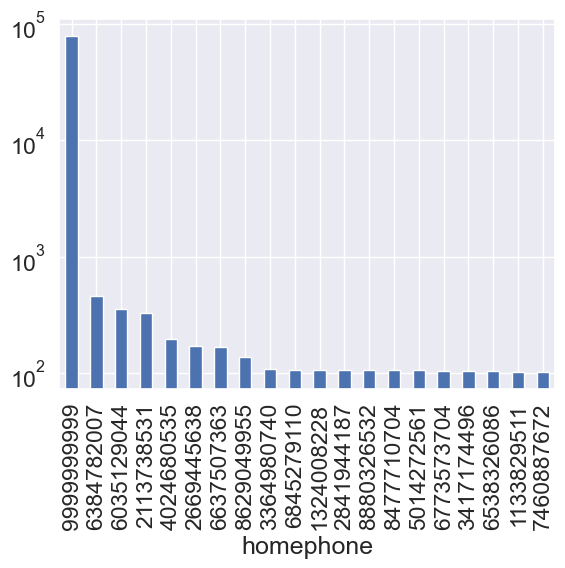

In [187]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

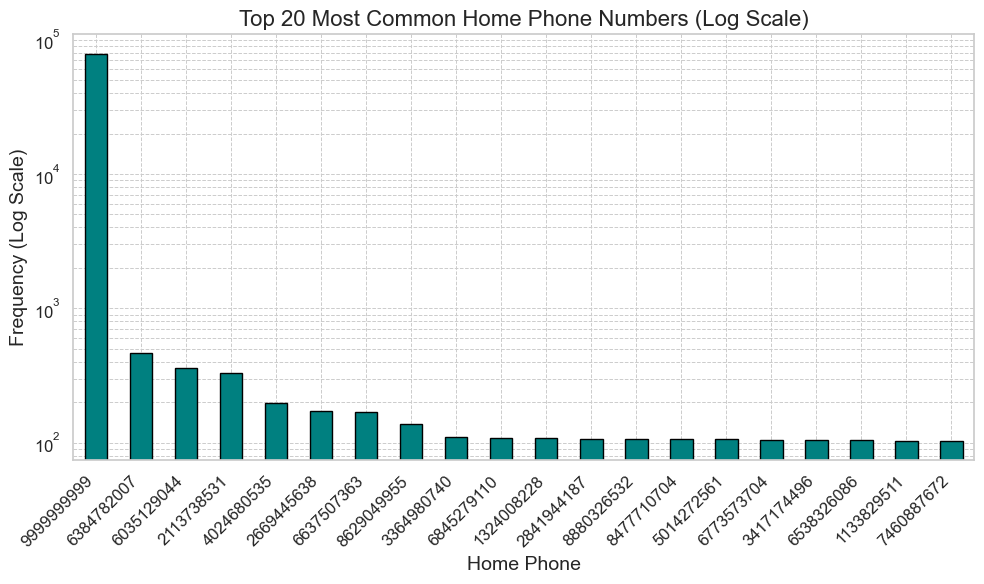

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style using seaborn for a clean look
sns.set(style="whitegrid")

# Create the figure and adjust the size for clarity
plt.figure(figsize=(10, 6))

# Plot the top 20 most common home phone numbers with a logarithmic scale on the y-axis
data['homephone'].value_counts().head(20).plot(kind='bar', logy=True, color='teal', edgecolor='black')

# Add title and labels with proper font size
plt.title('Top 20 Most Common Home Phone Numbers (Log Scale)', fontsize=16)
plt.xlabel('Home Phone', fontsize=14)
plt.ylabel('Frequency (Log Scale)', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for better visibility, ensure clear log scale labeling
plt.yticks(fontsize=12)

# Add grid lines to improve visual clarity
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Use tight layout to prevent label and title clipping
plt.tight_layout()

# Show the plot
plt.show()


In [188]:
data[data['homephone'] == 9999999999].head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy,fulladdress
17,18,2017-01-01,346374636,XRSSZZUXT,ETXZXJAJ,5719 UEZJT PL,51486,1950-01-10 00:00:00,9999999999,0,temp,5719 UEZJT PL 51486
26,27,2017-01-01,735495403,EMSSTSXUA,STZRUXZM,9323 STRMS PL,51395,1988-11-11 00:00:00,9999999999,0,temp,9323 STRMS PL 51395
60,61,2017-01-01,780136117,UZTZEETU,ARUZTZM,5317 UTXME ST,37840,1973-11-29 00:00:00,9999999999,0,temp,5317 UTXME ST 37840
64,65,2017-01-01,65,STUMMAMTS,SSJXTUJM,6393 UEJEA LN,41640,1907-06-26 00:00:00,9999999999,0,temp,6393 UEJEA LN 41640
145,146,2017-01-01,671506143,TXEMXZZM,SRTERSRA,5795 UMUTM BLVD,45077,1903-09-13 00:00:00,9999999999,0,temp,5795 UMUTM BLVD 45077
149,150,2017-01-01,149112205,EZTERXZRA,EERMAXJU,2249 XXAU DR,27375,1984-12-06 00:00:00,9999999999,0,temp,2249 XXAU DR 27375
178,179,2017-01-01,507916615,EUEJUURAR,XUSMXRU,8314 XXMX DR,398,1972-04-16 00:00:00,9999999999,0,temp,8314 XXMX DR 398
179,180,2017-01-01,106080337,SRARXRMRM,UTJMRJUX,8413 URUEU WY,15746,1907-06-26 00:00:00,9999999999,0,temp,8413 URUEU WY 15746
180,181,2017-01-01,291680381,MUSXJTSSX,EXAAJUT,9762 SXJXM LN,41694,1962-05-04 00:00:00,9999999999,0,temp,9762 SXJXM LN 41694
200,201,2017-01-01,13382014,EAMSTRMT,RURSXSXX,372 SXTEA DR,42716,1907-06-26 00:00:00,9999999999,0,temp,372 SXTEA DR 42716


In [189]:
len(data[data['homephone'] == 9999999999])

78512

In [190]:
data.loc[data['homephone'] == 9999999999, 'homephone'] = data.loc[data['homephone'] == 9999999999, 'record']

In [191]:
len(data[data['homephone'] == 9999999999])

0

In [192]:
data.head(30)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy,fulladdress
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26 00:00:00,1797504115,0,temp,6861 EUTST PL 2765
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15 00:00:00,4164239415,1,temp,7280 URASA PL 57169
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26 00:00:00,216537580,0,temp,5581 RSREX LN 56721
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30 00:00:00,132144161,0,temp,1387 UJZXJ RD 35286
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15 00:00:00,6101082272,0,temp,279 EAASA WY 3173
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,1948-06-13 00:00:00,5742016319,0,temp,4322 USJXU LN 8391
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,1964-03-18 00:00:00,7697396312,0,temp,478 EEXUM LN 41640
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,1919-05-28 00:00:00,2727421586,0,temp,8906 UUAJ PL 60567
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,1990-03-14 00:00:00,5520652307,0,temp,8266 SSEAR RD 37934
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,1975-01-27 00:00:00,3749451123,0,temp,9166 XXSAZ PL 93751


<Axes: xlabel='homephone'>

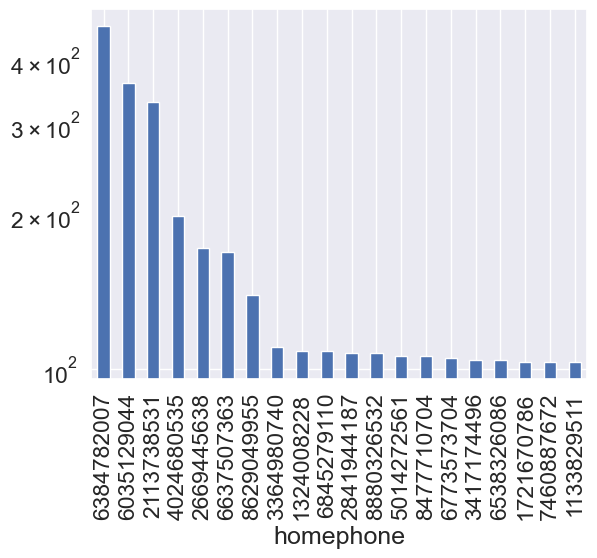

In [193]:
data['homephone'].value_counts().head(20).plot(kind='bar',logy=True)

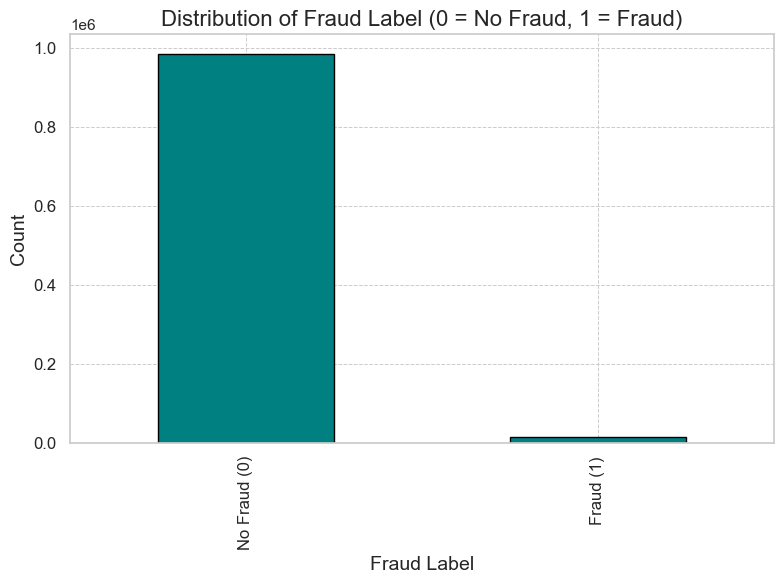

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style using seaborn for a clean look
sns.set(style="whitegrid")

# Create the figure and adjust the size for clarity
plt.figure(figsize=(8, 6))

# Plot the counts of fraud_label (0 and 1)
data['fraud_label'].value_counts().plot(kind='bar', color='teal', edgecolor='black')

# Add title and labels with proper font size
plt.title('Distribution of Fraud Label (0 = No Fraud, 1 = Fraud)', fontsize=16)
plt.xlabel('Fraud Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set custom x-axis tick labels for 0 and 1
plt.xticks(ticks=[0, 1], labels=['No Fraud (0)', 'Fraud (1)'], fontsize=12)

# Adjust y-axis tick labels for better visibility
plt.yticks(fontsize=12)

# Add grid lines for better visual clarity
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Use tight layout to prevent label and title clipping
plt.tight_layout()

# Show the plot
plt.show()


In [239]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Convert 'date' to datetime format and set it as the index
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d', errors='coerce')
data.set_index('date', inplace=True)

# Generate daily counts of applications
daily_count = data.assign(trx=np.ones(data.shape[0])).resample('D').count().trx

# Sort by date to ensure time is correctly represented
daily_count = daily_count.sort_index()

# Set a consistent color for all plots (you can change 'steelblue' to any color you prefer)
plot_color = 'darkblue'

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
daily_count.plot(color=plot_color, linewidth=2)  # Line color and thickness

# Add title and labels with proper font size
plt.title('Daily Applications Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust y-axis ticks for better visibility
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True, which="both", linestyle='--', linewidth=0.7)

# Add tight layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()


KeyError: 'date'

In [194]:
data = data.drop(columns = 'fulladdress')
data.head(10)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dummy
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1907-06-26 00:00:00,1797504115,0,temp
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,1934-06-15 00:00:00,4164239415,1,temp
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,1907-06-26 00:00:00,216537580,0,temp
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,1944-04-30 00:00:00,132144161,0,temp
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,1998-03-15 00:00:00,6101082272,0,temp
5,6,2017-01-01,922264214,XEEJJSTER,ERJSAXA,4322 USJXU LN,8391,1948-06-13 00:00:00,5742016319,0,temp
6,7,2017-01-01,415812149,XZJRJUSRR,STSMJRUM,478 EEXUM LN,41640,1964-03-18 00:00:00,7697396312,0,temp
7,8,2017-01-01,373752050,EJMRRSUXR,AMTZXRU,8906 UUAJ PL,60567,1919-05-28 00:00:00,2727421586,0,temp
8,9,2017-01-01,769970791,RXTSZJATS,RSXMRJME,8266 SSEAR RD,37934,1990-03-14 00:00:00,5520652307,0,temp
9,10,2017-01-01,732119085,EREMTZXXA,EXMMSEXT,9166 XXSAZ PL,93751,1975-01-27 00:00:00,3749451123,0,temp


In [195]:
data.shape

(1000000, 11)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   record       1000000 non-null  int64         
 1   date         1000000 non-null  datetime64[ns]
 2   ssn          1000000 non-null  int64         
 3   firstname    1000000 non-null  object        
 4   lastname     1000000 non-null  object        
 5   address      1000000 non-null  object        
 6   zip5         1000000 non-null  int64         
 7   dob          1000000 non-null  object        
 8   homephone    1000000 non-null  int64         
 9   fraud_label  1000000 non-null  int64         
 10  dummy        1000000 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 83.9+ MB


In [197]:
data.describe()

,record,date,ssn,zip5,homephone,fraud_label
count,1000000.000000,1000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000
mean,500000.500000,2017-07-01 19:54:34.588799744,4.914150e+08,50073.333143,4.583635e+09,0.014393
min,1.000000,2017-01-01 00:00:00,1.100000e+01,2.000000,1.800000e+01,0.000000
25%,250000.750000,2017-04-02 00:00:00,2.370395e+08,24992.000000,1.857659e+09,0.000000
50%,500000.500000,2017-07-02 00:00:00,4.916291e+08,50492.000000,4.544521e+09,0.000000
75%,750000.250000,2017-10-01 00:00:00,7.457676e+08,74496.000000,7.254188e+09,0.000000
max,1000000.000000,2017-12-31 00:00:00,9.999999e+08,99999.000000,9.999318e+09,1.000000
std,288675.278932,NaN,2.934649e+08,28915.921546,3.076022e+09,0.119104


In [198]:
data.to_csv('applications clean.csv', index = False)

In [199]:
print('duration: ', dt.datetime.now()-start_time)

duration:  0:00:36.452903
